# Data Preprocessing

 Исходный датасет имеет 5 переменных.
На первом этапе осуществим подготовку данных. Сперва импортируем необходимые библиотеки, вторым шагом загрузим файл с данными в формате csv.

In [81]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
# Importing the dataset
df = pd.read_csv('zad2.csv', sep=',')

Для наглядности выведем импортрованнные данные на экран; убедимся, что всё загрузилось должным образом. Имеем 5 столбцов, 400 строк.

In [83]:
df

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Построим графики распределения функций. 

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


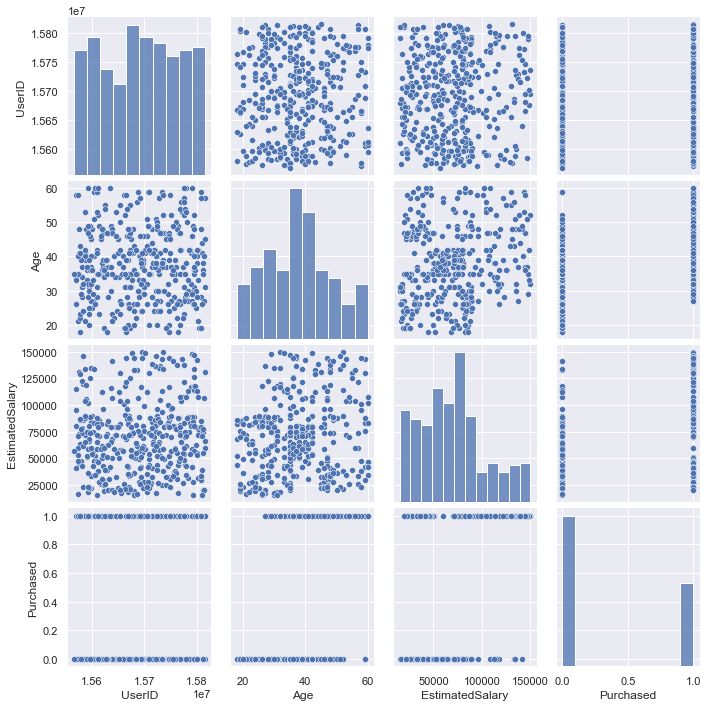

In [84]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Выведем статистику по числовым переменным, где сразу увидим, что в переменных отсутствуют пропущенные значения.

In [14]:
df.describe()

,UserID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [15]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от  выбросов переменные и повторно выведем статистику.
В результате выполнения очистки можно наблядать, что показатели максимального, минимального, среднего значений, а также стандартного отклонения прктически не изменились и соответствуют нормальному распределению, что говорит об отсутствии выбросов.

In [85]:
# Outliers
df = outliers(df)
df.describe()

,UserID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Проведем проверку типов данных по переменным и выявим соответствие.

In [86]:
df.dtypes

UserID              int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

Следующим этапом подготовки данных будет проверка на наличие пропущенных значений.
Выведем общее количество и процент пропусков по переменным. Как было указано ранее, пропуски отсутствуют.

In [87]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Purchased,0,0.0
EstimatedSalary,0,0.0
Age,0,0.0
Gender,0,0.0
UserID,0,0.0


Повторно выведем статистику и убедимся, что данные подготовлены и могут использоваться для моделирования.

In [22]:
df.describe()

,UserID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Предварительно построим корреляционную матрицу для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель.
Как можно определить изначально, большее влияние имеет переменная Age и EstimatedSalary.

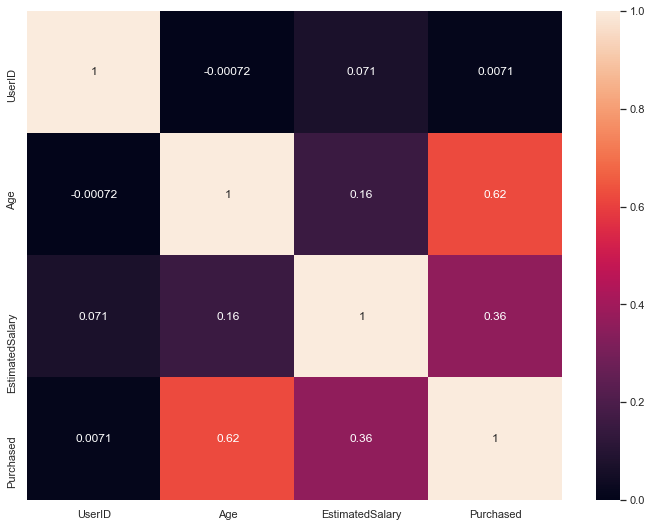

In [23]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Logistic Regression

Первым шагом для построения логистической регрессии нам необходимо произвести кодирование категориальных переменных. После выполнения представленной функции, записываем закодированные данные в датафрейм и выводим результат.

In [24]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [25]:
# Encoding categorical data
df = encoding_char(df)

In [26]:
df

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,0,19.0,19000.0,0.0
1,15810944.0,0,35.0,20000.0,0.0
2,15668575.0,1,26.0,43000.0,0.0
3,15603246.0,1,27.0,57000.0,0.0
4,15804002.0,0,19.0,76000.0,0.0
...,...,...,...,...,...
395,15691863.0,1,46.0,41000.0,1.0
396,15706071.0,0,51.0,23000.0,1.0
397,15654296.0,1,50.0,20000.0,1.0
398,15755018.0,0,36.0,33000.0,0.0


Поделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [35]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Произведем шкалирование данных, использя выборку train оценим параметры, затем преобразуем обучающую и тестовую выборки.

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Построим базовую модель и выведем по ней отчет. Как показывает статистика, значимыми являются переменнные 3 и 4,где P-value не привышает порог в 1 %.

In [37]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.380721
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.425     
Dependent Variable: y                AIC:              251.6615  
Date:               2020-12-21 12:14 BIC:              266.7348  
No. Observations:   320              Log-Likelihood:   -121.83   
Df Model:           3                LL-Null:          -211.70   
Df Residuals:       316              LLR p-value:      1.0042e-38
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1     -0.0549      0.1639    -0.3353    0.7374    -0.3761    0.2662
x2     -0.1354      0.1612    -0.8399    0.4010    -0.

Для убеждения  правильности отбора переменных проведем автоматический отбор.

In [38]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

3
[False  True  True  True]
[2 1 1 1]


Выведем индексы отобранных переменных.

In [39]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[1, 2, 3]
№	Index	Feature
0	1	Gender
1	2	Age
2	3	EstimatedSalary


Преобразуем обучающую и тестовую выборки, оставив в ней только значимые переменные.

In [41]:
# p-value < 3% Features
X_train = X_train[:,[1,2]]
X_test = X_test[:,[1,2]]

Обучим модель логистическй регрессии на 2 переменных.

In [42]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

Проведем прогноз на тестовой выборке и оценим качетво модели. Уровень качества высокий, 85% объектов распознаны верно.

In [43]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.85

Выведем таблицу сопряженности, которая показывает, что 5 позитивных объектов распознаны как негативные, а 7
негативных определены как позитивные.

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  7]
 [ 5 18]]


Произведем расчет доли ошибки, чувствителности и специфичности модели.

In [45]:
Error_rate = (5+7)/(80)
Error_rate

0.15

In [46]:
Se = 18/(18+5)
Se

0.782608695652174

In [47]:
Sp = 50/(50+7)
Sp

0.8771929824561403

Итак, можно увидеть, что в модели логистической регрессии чувствительность составляет 78%, специфичность 87%.Это говорит, что моделб лучше определяет истинно негативные слачаи.
Доля ошибки = 15%, точность удовлетворительна = 85%.
Это наш базовый уровень для построения НС.

# Classification Neural Network

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [48]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Построим нейронную сеть прямой передачи сигнала: 
Так как мы имеем дело с моделью классификации, то необходимо создавать сужающую структуру. Поэтому т.к. мною были выбраны 2 параметра классификации, но та входном слое НС будем иметь 2 нейронов, а на первом слое возьмем количество меньшее, равное 1. используем функцию активации "relu".
На втором слое возьмем 1 нейрон, так как мы имеем всего два класса (число выходов в начем случае = 2-1). Будем использовать сигмоидальную функцию активации, так как она изменяется в диапазоне от 0 до 1, что соответствует нашей эндогенной переменной.
Стоит отметить, что такие настройки НС были окончательно взяты после ряда подборов значений, и изменений точности модели.

In [49]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=1, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Обучаем модель партиями по 8 объектов в течении 100 эпох.

In [50]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 100, validation_data=(X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.6250 - val_loss: 0.6877 - val_accuracy: 0.7125
Epoch 2/100
320/320 [==============================] - 0s 334us/step - loss: 0.6874 - accuracy: 0.6250 - val_loss: 0.6797 - val_accuracy: 0.7125
Epoch 3/100
320/320 [==============================] - 0s 331us/step - loss: 0.6816 - accuracy: 0.6250 - val_loss: 0.6703 - val_accuracy: 0.7125
Epoch 4/100
320/320 [==============================] - 0s 300us/step - loss: 0.6739 - accuracy: 0.6250 - val_loss: 0.6583 - val_accuracy: 0.7125
Epoch 5/100
320/320 [==============================] - 0s 409us/step - loss: 0.6647 - accuracy: 0.6250 - val_loss: 0.6439 - val_accuracy: 0.7125
Epoch 6/100
320/320 [==============================] - 0s 341us/step - loss: 0.6545 - accuracy: 0.6250 - val_loss: 0.6281 - val_accuracy: 0.7125
Epoch 7/100
320/320 [==============================] - 0s 334us/step - loss: 0.6435 - a

Epoch 57/100
320/320 [==============================] - 0s 316us/step - loss: 0.4755 - accuracy: 0.8313 - val_loss: 0.3988 - val_accuracy: 0.8750
Epoch 58/100
320/320 [==============================] - 0s 297us/step - loss: 0.4748 - accuracy: 0.8313 - val_loss: 0.3977 - val_accuracy: 0.8750
Epoch 59/100
320/320 [==============================] - 0s 434us/step - loss: 0.4741 - accuracy: 0.8313 - val_loss: 0.3981 - val_accuracy: 0.8750
Epoch 60/100
320/320 [==============================] - 0s 359us/step - loss: 0.4732 - accuracy: 0.8313 - val_loss: 0.3975 - val_accuracy: 0.8750
Epoch 61/100
320/320 [==============================] - 0s 281us/step - loss: 0.4724 - accuracy: 0.8313 - val_loss: 0.3963 - val_accuracy: 0.8750
Epoch 62/100
320/320 [==============================] - 0s 322us/step - loss: 0.4717 - accuracy: 0.8313 - val_loss: 0.3963 - val_accuracy: 0.8750
Epoch 63/100
320/320 [==============================] - 0s 322us/step - loss: 0.4711 - accuracy: 0.8313 - val_loss: 0.3947 -

Построим График, который демонстрирует уменьшение потерь по выборкам.

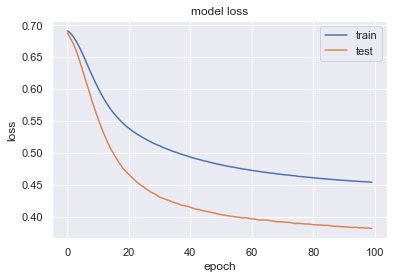

In [51]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Произведем прогноз на тестовой выборке, задав порог = 0,51 (подобран в ходе экспериментов)

In [76]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.51)

Выведем таблицу сопряженности, которая показывает, что 6 позитивных объектов распознаны как негативные, а 4
негативных определены как позитивные.

In [77]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[53  4]
 [ 6 17]]


Произведем расчет доли ошибки, чувствителности и специфичности модели.

In [65]:
Accurary_rate = (53+17)/(80)
Accurary_rate

0.875

In [78]:
Error_rate = (6+4)/(80)
Error_rate

0.125

In [79]:
Se = 17/(17+6)
Se

0.7391304347826086

In [80]:
Sp = 53/(53+4)
Sp

0.9298245614035088

По сравнению с простой логистической регрессией(85%) модель НС имеет более высокую тосность = 87,5%. Доля ошибок снизилась с 15 % до 12,5%.
При этом снизилась чувстивельность с 78% до 73%, а специфичность возрасла с 87,7% до 92%. 

В итоге получаем результат результат, который несколько лучше базовой модели.